In [1]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


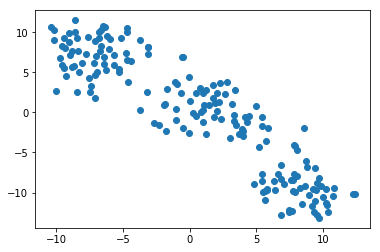

In [2]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

scaledWine = scale(df)
tsneVisual = TSNE().fit_transform(scaledWine)
plt.scatter(tsneVisual[:,0], tsneVisual[:,1])
plt.show()

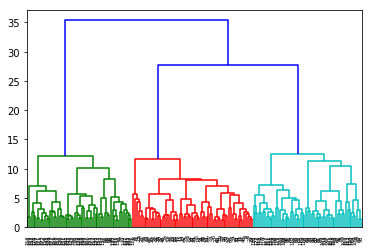

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(scaledWine, 'ward')

dendrogram(Z)
plt.show()


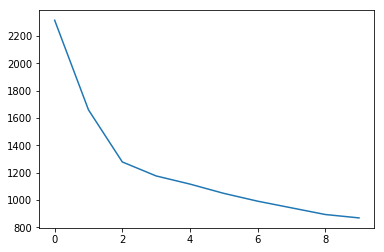

In [4]:
from sklearn.cluster import KMeans
maxK = 10
sse = []
for k in range(maxK):
    k_means_model = KMeans(init='k-means++', n_clusters = k+1);
    k_means_model.fit(scaledWine)
    labeled = k_means_model.predict(scaledWine)
    sse.append(k_means_model.inertia_)

plt.plot(sse)

locs, _ = plt.yticks()
single_tick = locs[1] - locs[0]
sse = list(map(lambda x: x/single_tick, sse))

In [5]:
from numpy import arccos, clip
from numpy.linalg import norm

angles = []

for idx in range(len(sse)-2):
    prev = idx
    curr = idx + 1
    next = idx + 2
    u = [-1, sse[prev] - sse[curr]]
    v = [1, sse[next] - sse[curr]]
    angle = arccos(dot(u,v)/norm(u)/norm(v)) # -> cosine of the angle
    angles.append(angle)
    
minIdx = angles.index(min(angles))
optimalK = minIdx + 2
optimalK

NameError: name 'dot' is not defined